# SCC0570 - Introdução à Redes Neurais (ICMC - USP)

* Alef Segura Santos, 9762942
* Guatavo de Moura Souza, 9762981

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Input

In [2]:
dataset = pd.read_csv('semeion.data', sep=' ', lineterminator='\n', header=None).iloc[:,:-1]

### Amostra de imagens

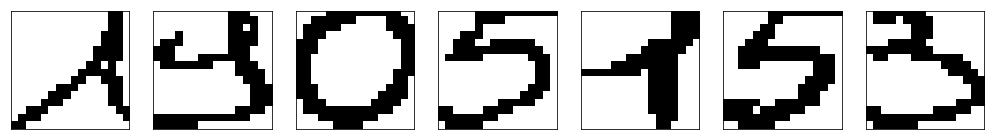

In [423]:
plt.figure(figsize=(20,5))
for i in range(1,8):
    plt.subplot(1,8,i)
    plt.imshow(dataset.iloc[:,:256].sample().values.reshape(16,16), cmap='binary');
    plt.xticks([])
    plt.yticks([])

# Perceptron Multicamada

In [424]:
class PerceptronMulticamada:
    
    # Configuração inicial da Rede Neural
    def __init__(self, learning_rate=0.5, n_input=1, hidden_layers=(3,3), n_output=1):
        n_input += 1
        hidden_layers = tuple([x+1 for x in hidden_layers])
        self.layers = (n_input,) + hidden_layers + (n_output,)
        self.learning_rate = learning_rate
        self.weights = [np.zeros((self.layers[i]-1,self.layers[i-1])) for i in range(1,len(self.layers)-1)]
        self.weights.append(np.zeros((self.layers[-1],self.layers[-2])))

    # Treinamento
    def fit(self, X, y):
        for v,label in zip(X,y):
            for i in range(1,len(self.layers)):
                print(v)
                v = self.feed(v,self.weights[i-1])
                print(v)
                print('\n')
            self.backprop(v,label)
        
    # Feedforward
    def feed(self, X, weights):
        X = np.insert(X,0,1)
        print(X)
        print([w for w in weights])
        return [self.sinal(np.sum(X*w)) for w in weights]
    
    # Backpropagation do erro
    def backprop(self, y_true, y_predicted):
        # ToDo
        return None
    
    # Função sinal
    def sinal(self, n):
        return 0.0 if n <= 1.0 else -1.0
            
    # Imprime as camadas e os pesos
    def get_net(self):
        print(self.layers[0])
        for w,n in zip(self.weights,self.layers[1:]):
            print(w.tolist())
            print(n)

In [425]:
PerceptronMulticamada(n_input=1, hidden_layers=(2,2), n_output=1).fit([0],[1])

0
[1 0]
[array([ 0.,  0.]), array([ 0.,  0.])]
[0.0, 0.0]


[0.0, 0.0]
[ 1.  0.  0.]
[array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.])]
[0.0, 0.0]


[0.0, 0.0]
[ 1.  0.  0.]
[array([ 0.,  0.,  0.])]
[0.0]




# Aplicação
## Reconhecendo dígitos manuscritos

In [416]:
X = dataset.iloc[:,:256].values
y = dataset.iloc[:,256:].values

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [419]:
rn = PerceptronMulticamada(n_input=256, n_output=10, hidden_layers=(1,))
rn.get_net()

257
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,